## Steps

Identify Problem statement and define objectives <br>
Collecting Data <br>
Preparing the Data (EDA) <br>
Choosing a Model <br>
Training the Model <br>
Evaluating the Model <br>
Parameter Tuning<br>
Making Predictions<br>
Deploy the application<br>

In [ ]:
# import the libraries
import numpy as np
import pandas as pd# import the dataset
df = pd.read_csv('HepatitisCdata.csv')# get dummy variables


In [ ]:
df.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,25,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,28,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,31,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,34,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,37,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [ ]:
df[45:60]

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
45,46,0=Blood Donor,46,m,41.7,77.2,103.6,46.9,10.4,12.21,5.63,88.0,20.9,69.3
46,47,0=Blood Donor,51,m,45.9,58.8,29.7,27.7,11.7,5.60,4.89,93.0,23.1,70.8
47,48,0=Blood Donor,56,m,48.7,65.0,11.5,18.0,7.4,8.02,7.35,69.0,14.2,73.4
48,49,0=Blood Donor,61,m,53.0,66.4,40.8,23.2,7.5,8.73,5.81,75.0,36.1,77.3
49,50,0=Blood Donor,66,m,47.8,89.0,48.5,38.4,8.6,8.26,5.62,96.0,21.9,76.2
50,51,0=Blood Donor,71,m,42.6,65.3,35.8,27.1,15.7,10.66,4.38,96.0,34.7,71.0
51,52,0=Blood Donor,76,m,42.4,47.3,23.0,25.5,6.1,9.46,5.29,79.0,17.5,73.8
52,53,0=Blood Donor,81,m,48.9,82.8,16.9,24.4,8.9,8.91,5.10,97.0,14.8,79.9
53,54,0=Blood Donor,86,m,31.4,106.0,16.6,17.0,2.4,5.95,5.30,68.0,22.9,72.3
54,55,0=Blood Donor,37,m,42.9,70.7,16.3,24.1,15.7,9.03,6.80,93.0,70.1,73.4


In [ ]:
df.isnull().sum() # check for null values

Unnamed: 0    0
Category      0
Age           0
Sex           0
ALB           0
ALP           0
ALT           0
AST           0
BIL           0
CHE           0
CHOL          0
CREA          0
GGT           0
PROT          0
dtype: int64

In [ ]:
df.shape

(615, 14)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(615, 14)

In [ ]:
df.describe()

,Unnamed: 0,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.00000
mean,308.000000,56.265041,41.586667,69.099480,28.916748,34.786341,11.396748,8.196634,5.352358,81.287805,39.533171,72.05187
std,177.679487,14.913092,5.835463,27.220424,27.949265,33.090690,19.673150,2.205657,1.155866,49.756166,54.661071,5.40164
min,1.000000,19.000000,14.900000,10.160000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.80000
25%,154.500000,46.000000,38.800000,52.600000,16.400000,21.600000,5.300000,6.935000,4.600000,67.000000,15.700000,69.30000
50%,308.000000,57.000000,41.900000,66.400000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.20000
75%,461.500000,68.000000,45.200000,81.350000,33.100000,32.900000,11.200000,9.590000,6.060000,88.000000,40.200000,75.40000
max,615.000000,90.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.00000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  

In [ ]:
df.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,25,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,28,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,31,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,34,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,37,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [ ]:
df.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,25,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,28,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,31,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,34,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,37,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [ ]:
df.shape

(615, 14)

In [ ]:
df. drop('Unnamed: 0', axis=1, inplace=True) # Drop Customerid

In [ ]:
df.shape

(615, 13)

In [ ]:
df.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0=Blood Donor,25,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0=Blood Donor,28,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0=Blood Donor,31,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0=Blood Donor,34,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0=Blood Donor,37,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


<Axes: xlabel='Category', ylabel='Age'>

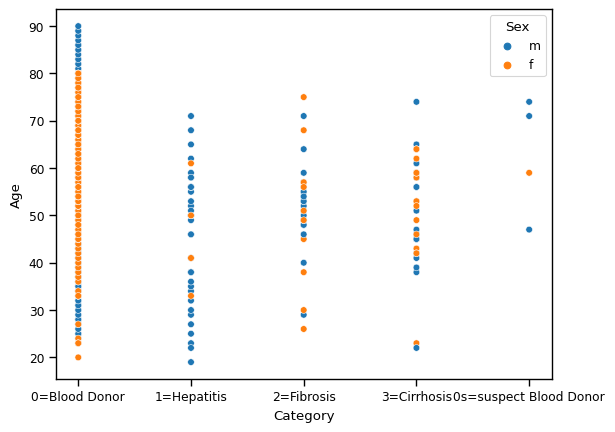

In [ ]:
sns.set_context("paper")
sns.scatterplot(x='Category', y='Age', data=df, hue='Sex')

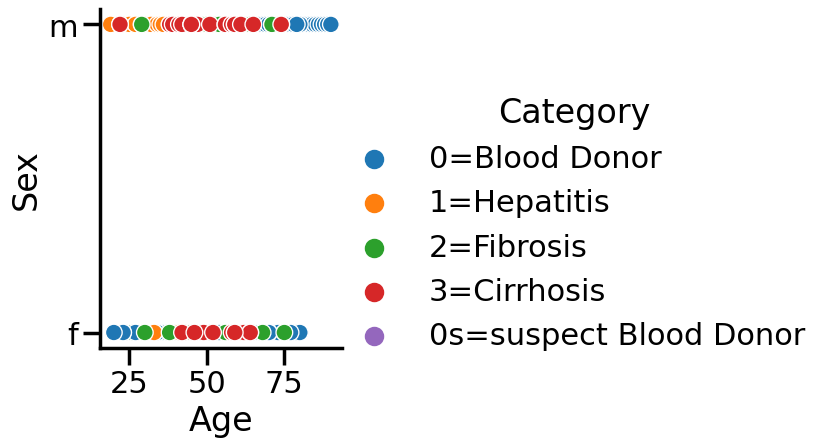

In [ ]:
# Generate relation ship plot between Age and Estimated Salary based on Gender
sns.set_context("poster")
sns.relplot(data=df, x="Age", y="Sex", hue="Category")

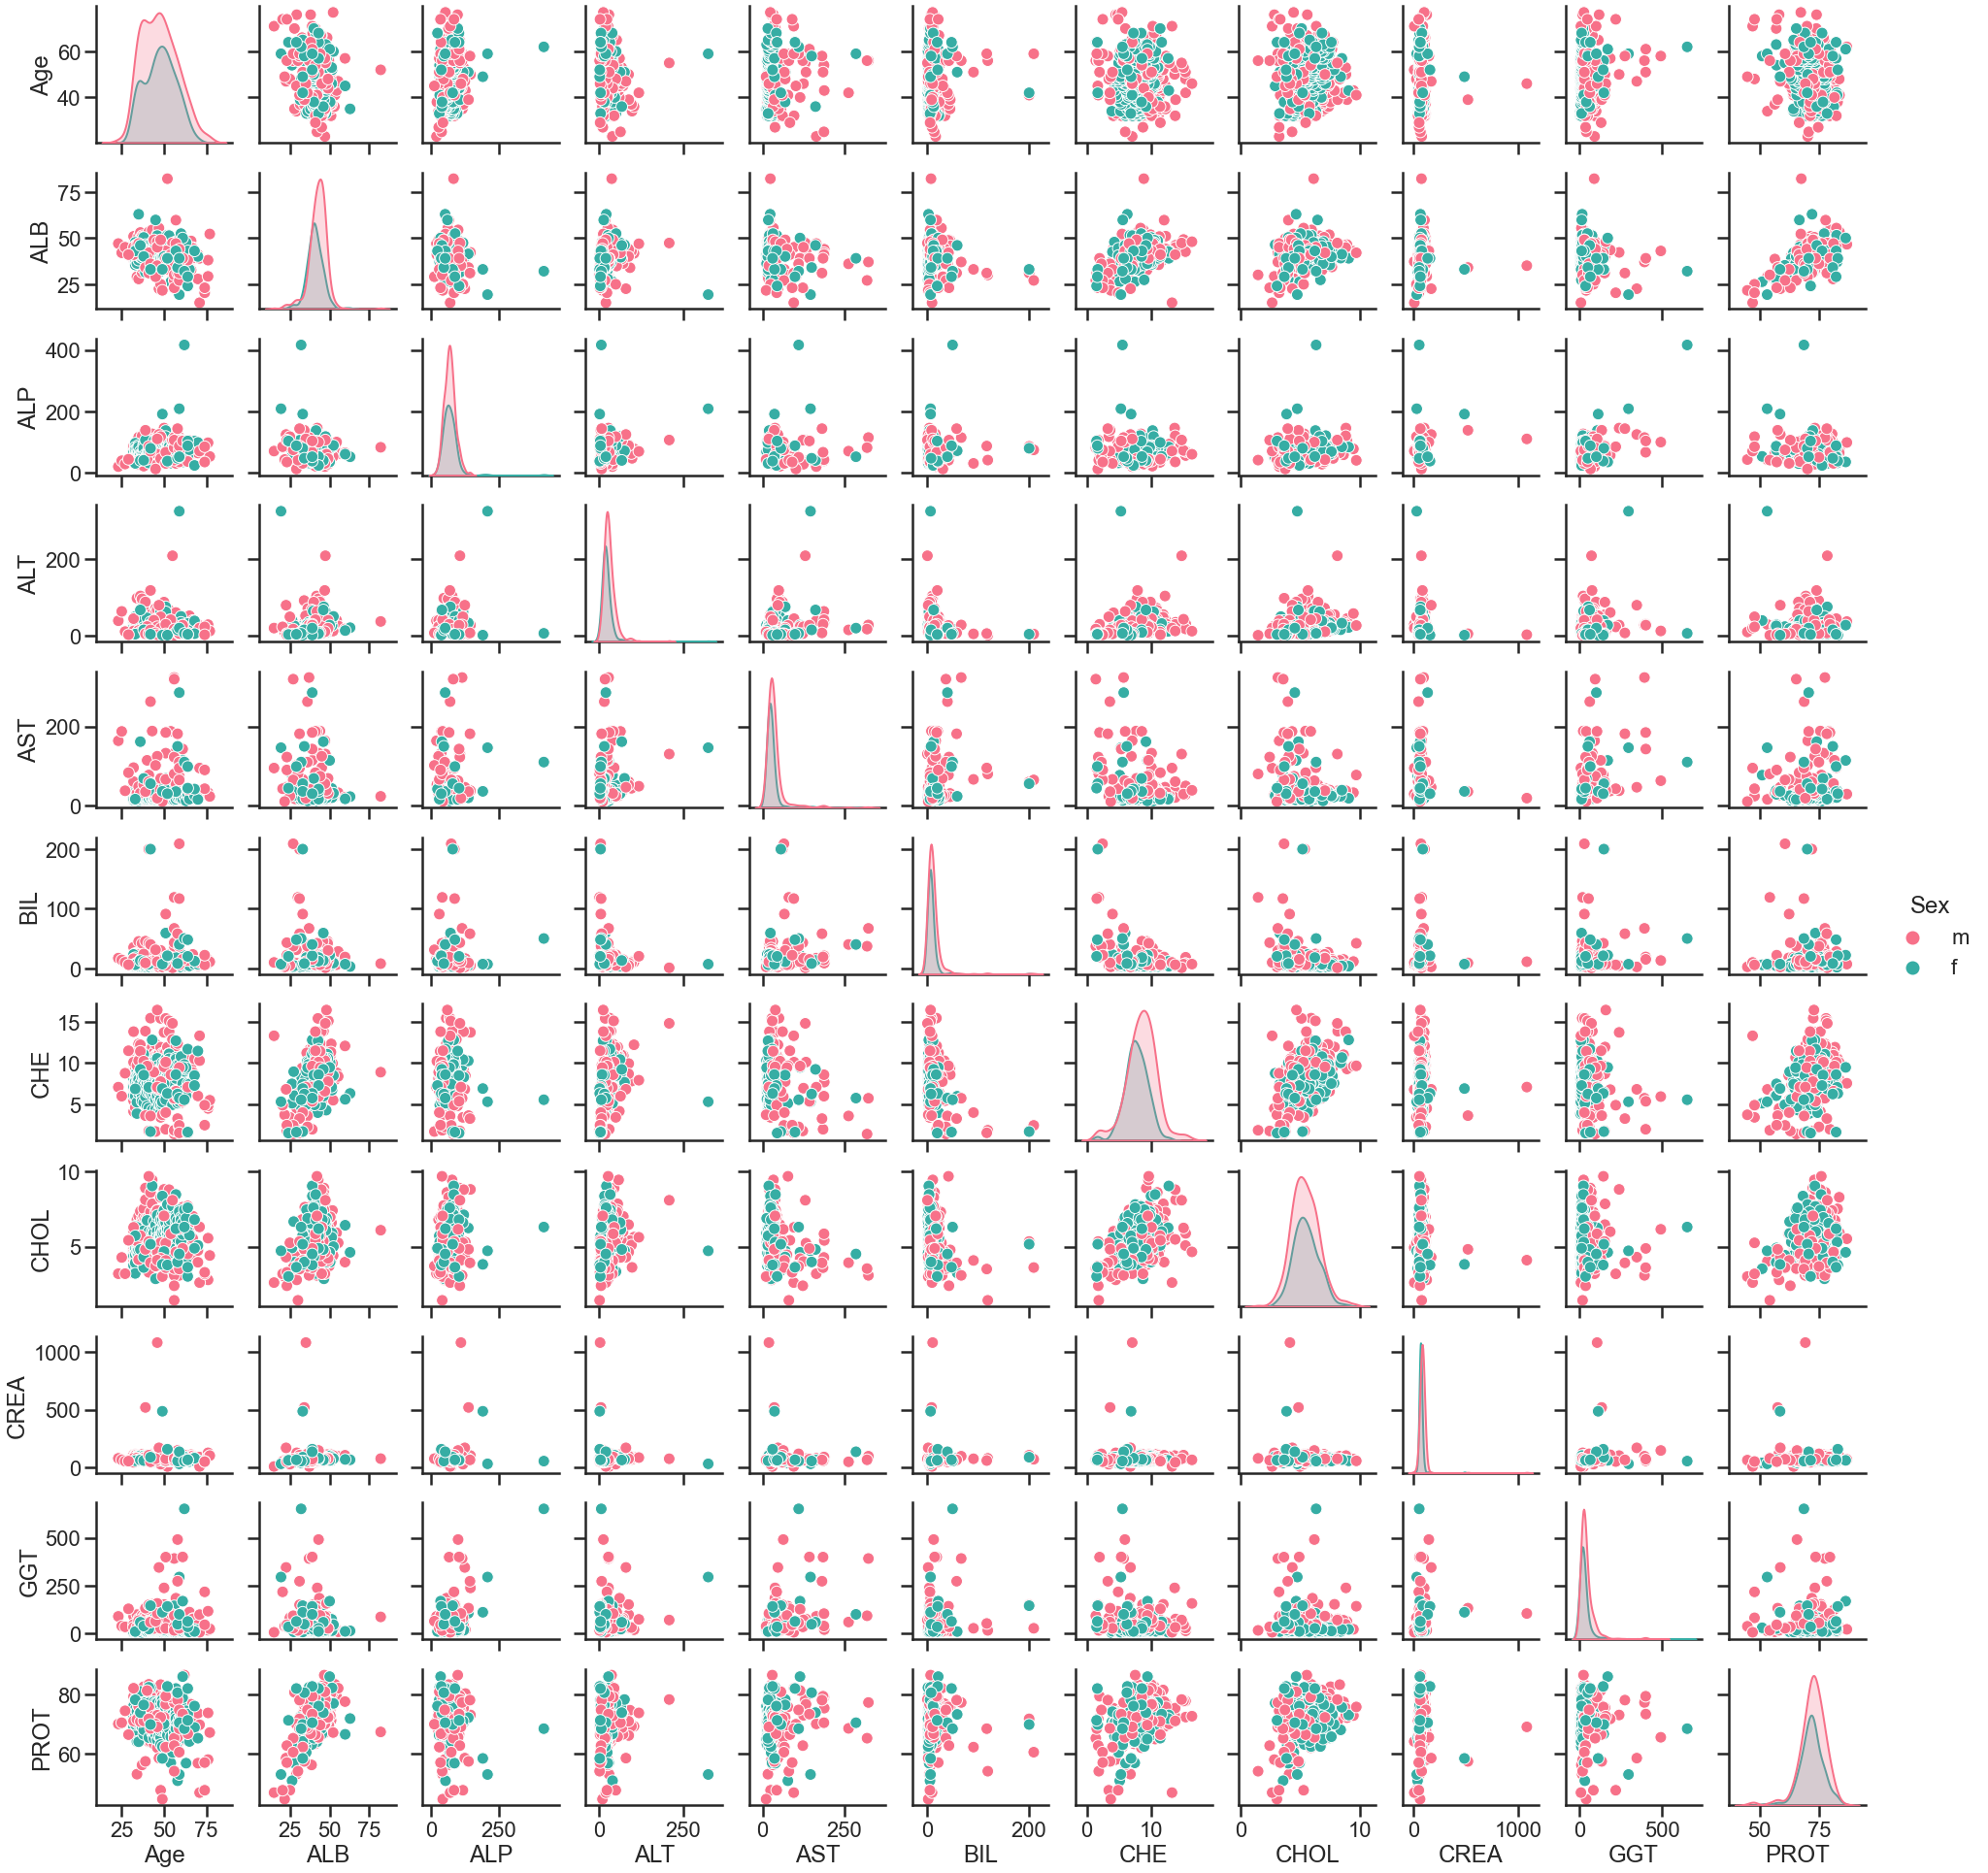

In [ ]:
# PairPlot

sns.set_style("ticks")

sns.pairplot(df,hue = 'Sex',diag_kind = "kde",kind = "scatter",palette = "husl")

plt.show()

<ipython-input-28-c96010eb2167>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'], bins = 10, color = 'green', label = 'KDE')


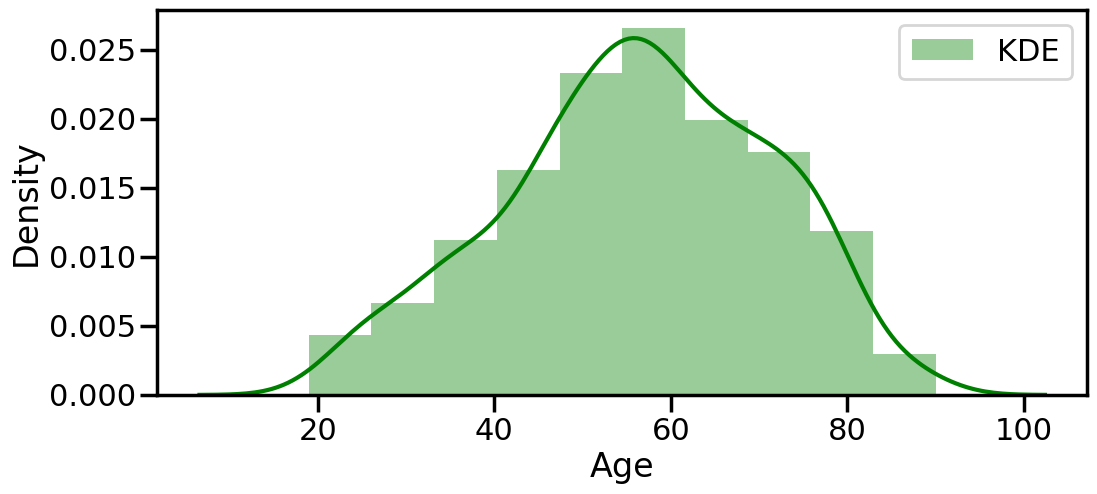

In [ ]:
# Age is normally distributed around 37 years, and most of the people studied are from 35 to 45 years.
sns.distplot(df['Age'], bins = 10, color = 'green', label = 'KDE')
plt.legend()
plt.gcf().set_size_inches(12, 5)


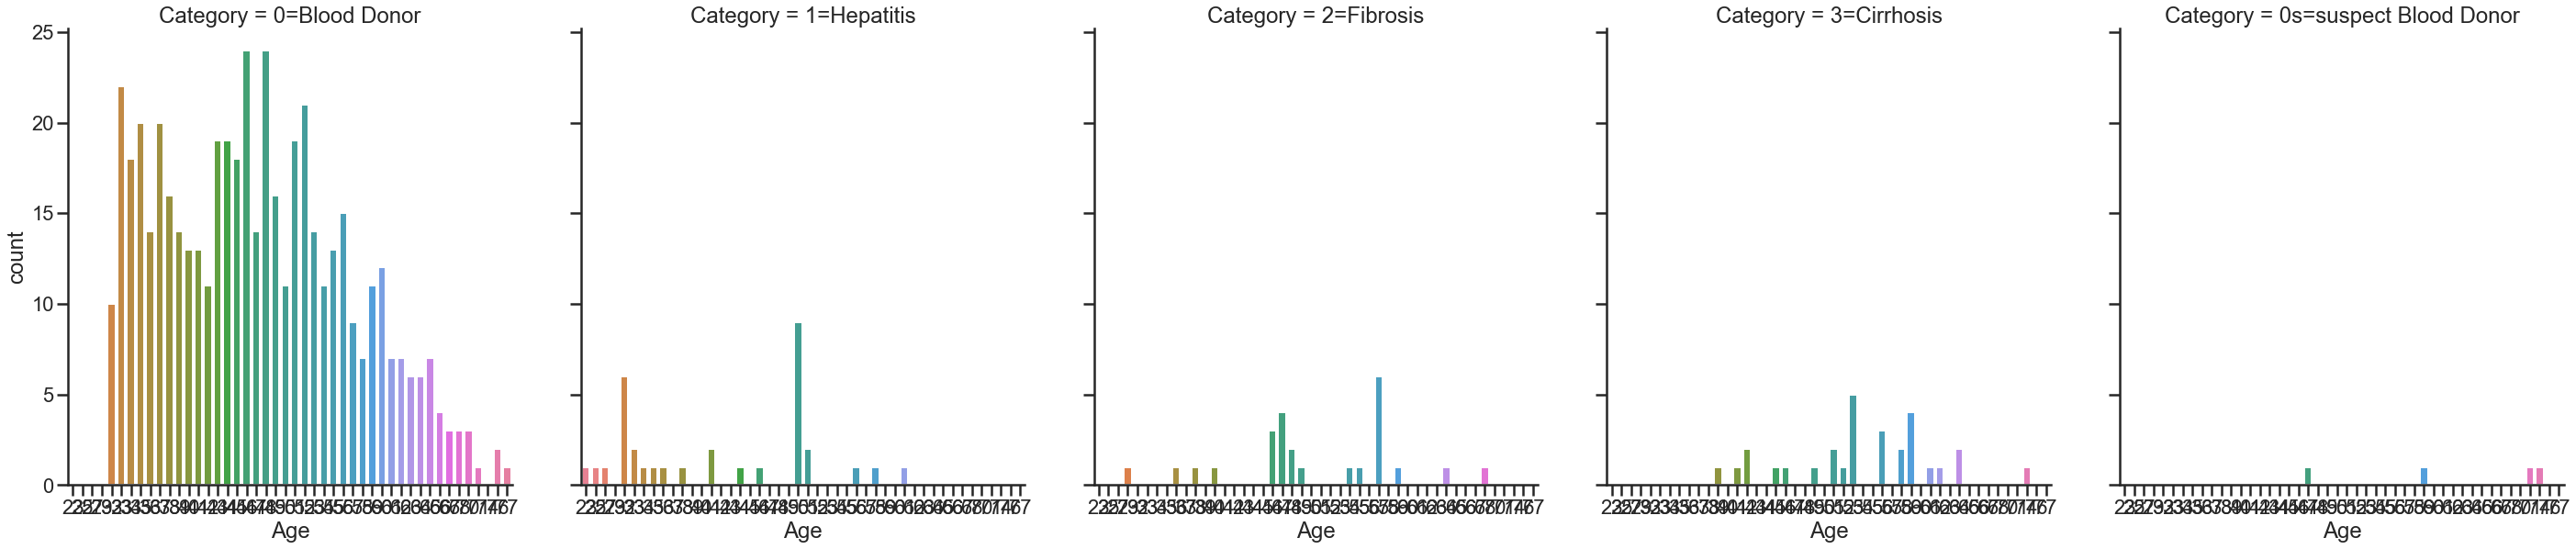

In [ ]:
sns.set_context("poster")
sns.catplot(x="Age", col = 'Category', data=df, kind = 'count', palette='husl')
plt.gcf().set_size_inches(40, 10)
plt.show()

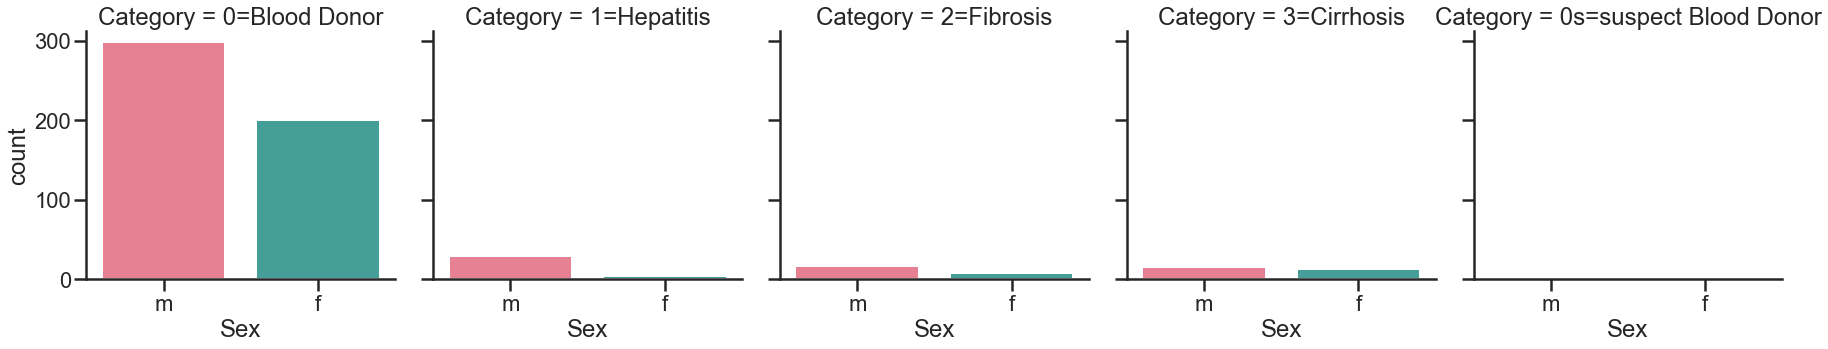

In [ ]:
sns.catplot(x="Sex", col = 'Category', data=df, kind = 'count', palette='husl')
plt.show()

# Model Implementation

In [ ]:
df_getdummy=pd.get_dummies(data=df, columns=['Sex'])

# seperate X and y variables
X = df_getdummy.drop('Category',axis=1)
y = df_getdummy['Category']   

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     615 non-null    int64  
 1   ALB     615 non-null    float64
 2   ALP     615 non-null    float64
 3   ALT     615 non-null    float64
 4   AST     615 non-null    float64
 5   BIL     615 non-null    float64
 6   CHE     615 non-null    float64
 7   CHOL    615 non-null    float64
 8   CREA    615 non-null    float64
 9   GGT     615 non-null    float64
 10  PROT    615 non-null    float64
 11  Sex_f   615 non-null    uint8  
 12  Sex_m   615 non-null    uint8  
dtypes: float64(10), int64(1), uint8(2)
memory usage: 54.2 KB


In [ ]:
# split the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)# feature scaling


In [ ]:
y

0      0=Blood Donor
1      0=Blood Donor
2      0=Blood Donor
3      0=Blood Donor
4      0=Blood Donor
           ...      
610      3=Cirrhosis
611      3=Cirrhosis
612      3=Cirrhosis
613      3=Cirrhosis
614      3=Cirrhosis
Name: Category, Length: 615, dtype: object

In [ ]:
# Scale the data set
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



In [ ]:
X_test.shape

(154, 13)

In [ ]:
# fit Logistic Regression to the training set

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# predict the Test set results
y_pred = classifier.predict(X_test)



In [ ]:
## Generate Confusion Matrix for evaluation
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)


array([[125,   0,   0,   0,   0],
       [  0,   1,   0,   0,   1],
       [  6,   0,   0,   2,   1],
       [  5,   0,   1,   3,   1],
       [  1,   0,   0,   0,   7]])

In [ ]:
# find accuracy socre (Accuracy = number of times you’re right / number of predictions)
from sklearn.metrics import accuracy_score
paccur=accuracy_score(y_true=y_train, y_pred=classifier.predict(X_train))
print('The accuracy of the logistic regression is: ' +str(paccur*100) + ' %.')

The accuracy of the logistic regression is: 90.88937093275487 %.


In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm.shape

(5, 5)

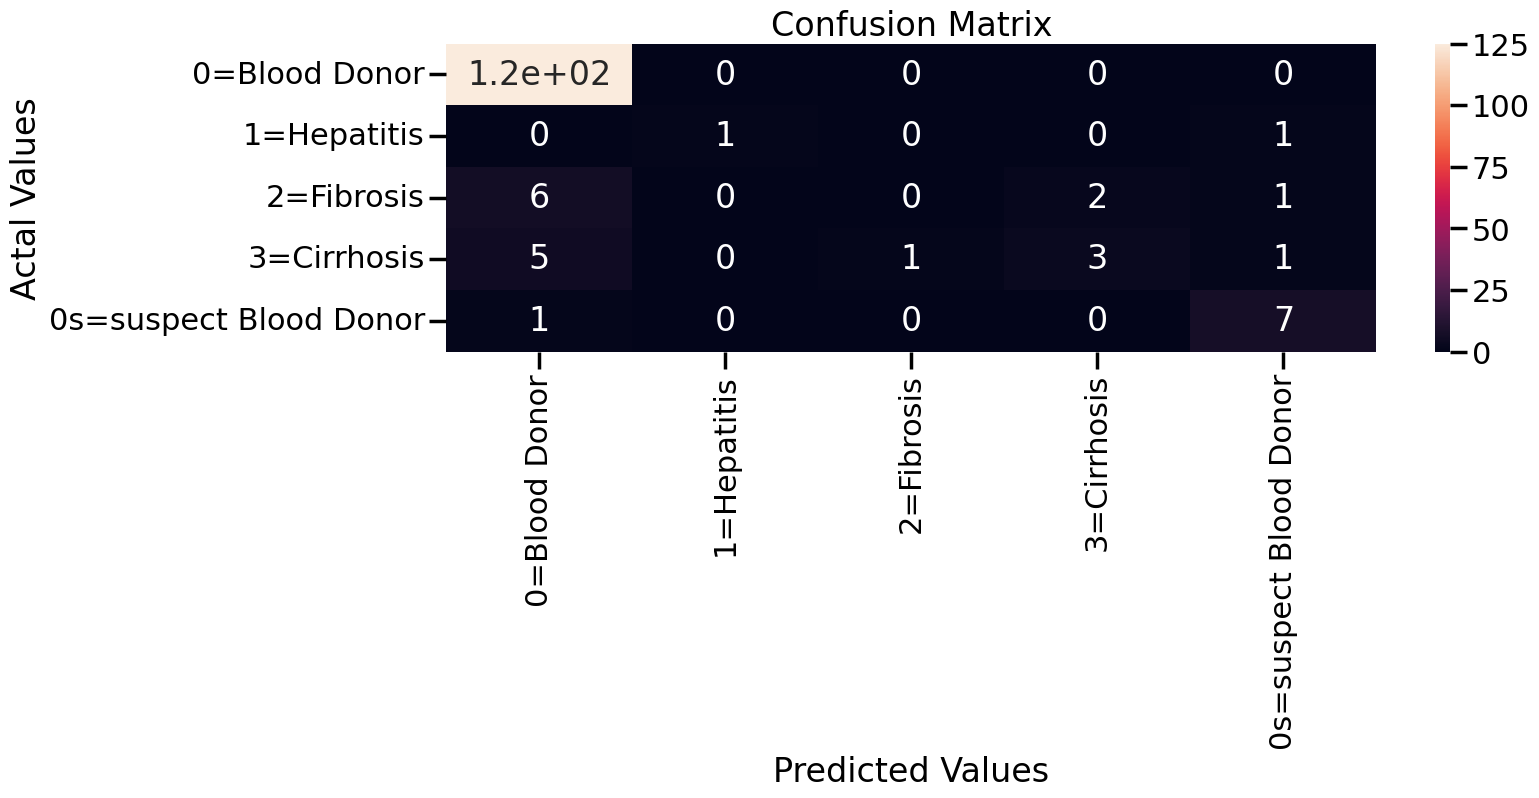

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm,
                     index = ['0=Blood Donor','1=Hepatitis' , '2=Fibrosis','3=Cirrhosis' , '0s=suspect Blood Donor'], 
                     columns = ['0=Blood Donor','1=Hepatitis' , '2=Fibrosis','3=Cirrhosis' , '0s=suspect Blood Donor'])
#Plotting the confusion matrix
plt.figure(figsize=(15,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

### Prediction  


In [ ]:
test_pred=classifier.predict([[37,54.5,0,6.6,30.0,28.3,7.8,7.1,89.0,29.5,9,87,34],[87,54.5,1,6.6,30.0,18.3,7.8,5.1,89.0,29.5,89,37,84]])

test_pred

array(['3=Cirrhosis', '2=Fibrosis'], dtype=object)

In [ ]:
df.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0=Blood Donor,25,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0=Blood Donor,28,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0=Blood Donor,31,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0=Blood Donor,34,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0=Blood Donor,37,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


# Various Classification Model Implementation

In [ ]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
ds=pd.read_csv('HepatitisCdata.csv')
ds.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,25,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,28,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,31,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,34,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,37,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [ ]:
df_getdummy=pd.get_dummies(data=df, columns=['Sex'])

# seperate X and y variables
x = df_getdummy.drop('Category',axis=1)
y = df_getdummy['Category']   

In [ ]:

y_test

49              0=Blood Donor
496             0=Blood Donor
211             0=Blood Donor
249             0=Blood Donor
142             0=Blood Donor
                ...          
96              0=Blood Donor
313             0=Blood Donor
533    0s=suspect Blood Donor
202               1=Hepatitis
89              0=Blood Donor
Name: Category, Length: 154, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

In [ ]:
# Increase the training set size
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
# Logistic Regression 
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

#getting confusion matrix
from sklearn.metrics import confusion_matrix
y_pred_log = lr.predict(x_test)
cm = confusion_matrix(y_test,y_pred_log)
print('confusion matrix:\n',cm)

#checking accuracy
from sklearn.metrics import accuracy_score
lra = accuracy_score(y_test,y_pred_log)
print('accuracy score = ',lra)

confusion matrix:
 [[99  0  0  0  0]
 [ 0  1  0  0  0]
 [ 5  0  0  2  1]
 [ 4  0  0  2  1]
 [ 1  0  0  0  7]]
accuracy score =  0.8861788617886179


In [ ]:
#KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski',p = 2)
knn.fit(x_train,y_train)

#getting confusion matrix
from sklearn.metrics import confusion_matrix
y_pred_KNN = knn.predict(x_test)
cm = confusion_matrix(y_test,y_pred_KNN)
print('confusion matrix:\n',cm)

#checking accuracy
from sklearn.metrics import accuracy_score
knna = accuracy_score(y_test,y_pred_KNN)
print('accuracy score = ',knna)

confusion matrix:
 [[99  0  0  0  0]
 [ 1  0  0  0  0]
 [ 5  0  0  2  1]
 [ 5  0  0  2  0]
 [ 2  0  0  1  5]]
accuracy score =  0.8617886178861789


In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy')
dt.fit(x_train,y_train)

#getting confusion matrix
from sklearn.metrics import confusion_matrix
y_pred_dec = dt.predict(x_test)
cm = confusion_matrix(y_test,y_pred_dec)
print('confusion matrix:\n',cm)

#checking accuracy
from sklearn.metrics import accuracy_score
dta = accuracy_score(y_test,y_pred_dec)
print('accuracy score = ',dta)

confusion matrix:
 [[97  0  1  0  1]
 [ 1  0  0  0  0]
 [ 4  0  0  3  1]
 [ 3  0  1  2  1]
 [ 1  0  0  2  5]]
accuracy score =  0.8455284552845529


In [ ]:
# Naive Bayesian
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)

#getting confusion matrix
from sklearn.metrics import confusion_matrix
y_pred_NB = nb.predict(x_test)
cm = confusion_matrix(y_test,y_pred_NB)
print('confusion matrix:\n',cm)

#checking accuracy
from sklearn.metrics import accuracy_score
nba = accuracy_score(y_test,y_pred_NB)
print('accuracy score = ',nba)

confusion matrix:
 [[91  0  5  3  0]
 [ 0  1  0  0  0]
 [ 4  0  2  1  1]
 [ 4  0  1  2  0]
 [ 1  0  0  2  5]]
accuracy score =  0.8211382113821138


In [ ]:
# Kernel = linear
from sklearn.svm import SVC
svc = SVC(kernel = 'linear')
svc.fit(x_train,y_train)

#getting confusion matrix
from sklearn.metrics import confusion_matrix
y_pred_LSVM = svc.predict(x_test)
cm = confusion_matrix(y_test,y_pred_LSVM)
print('confusion matrix:\n',cm)

#checking accuracy
from sklearn.metrics import accuracy_score
sva =accuracy_score(y_test,y_pred_LSVM)
print('accuracy score = ',sva)

confusion matrix:
 [[99  0  0  0  0]
 [ 0  1  0  0  0]
 [ 5  0  0  2  1]
 [ 5  0  0  1  1]
 [ 2  1  0  0  5]]
accuracy score =  0.8617886178861789


In [ ]:
# SVM - Kernel -rbf
from sklearn.svm import SVC
svc = SVC(kernel = 'rbf')
svc.fit(x_train,y_train)

#getting confusion matrix
from sklearn.metrics import confusion_matrix
y_pred_RSVM = svc.predict(x_test)
cm = confusion_matrix(y_test,y_pred_RSVM)
print('confusion matrix:\n',cm)

#checking accuracy
from sklearn.metrics import accuracy_score
sva2 = accuracy_score(y_test,y_pred_RSVM)
print('accuracy score = ',sva2)

confusion matrix:
 [[99  0  0  0  0]
 [ 0  0  0  0  1]
 [ 5  0  0  2  1]
 [ 5  0  0  0  2]
 [ 2  0  0  1  5]]
accuracy score =  0.8455284552845529


In [ ]:
# RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
rf.fit(x_train,y_train)

#getting confusion matrix
from sklearn.metrics import confusion_matrix
y_pred_RF = rf.predict(x_test)
cm = confusion_matrix(y_test,y_pred_RF)
print('confusion matrix:\n',cm)

#checking accuracy
from sklearn.metrics import accuracy_score
rfa = accuracy_score(y_test,y_pred_RF)
print('accuracy score = ',rfa)

confusion matrix:
 [[99  0  0  0  0]
 [ 1  0  0  0  0]
 [ 5  0  0  2  1]
 [ 4  0  1  2  0]
 [ 3  0  0  2  3]]
accuracy score =  0.8455284552845529


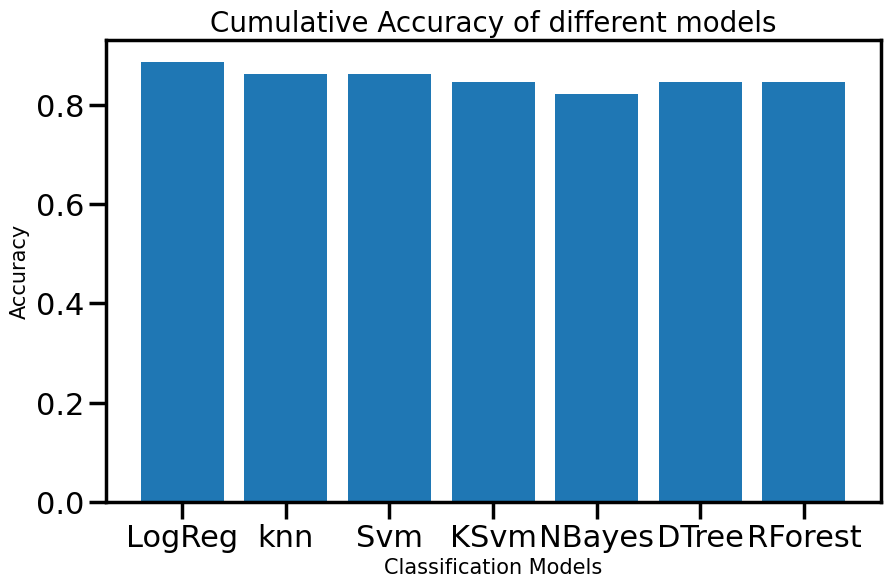

In [ ]:
plt.figure(figsize= (10,6))
ac = [lra,knna,sva,sva2,nba,dta,rfa]
name = ['LogReg','knn','Svm','KSvm','NBayes','DTree', 'RForest']
plt.title('Cumulative Accuracy of different models', fontsize = 20)
plt.xlabel('Classification Models', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)

plt.bar(name,ac)
plt.show()